##Homework 4. Анализ датасета на выбросы, шум и дрифты

импорты

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

In [2]:
from google.colab import drive

drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

## **1. Берём задачу из прошлых лабараторных и в частности датасет**

Берём задачу определения качества вина и датасет из прошлых лабораторных.

In [41]:
#data = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')
data = pd.read_csv('winequality-red.csv')
display(data.info())
display(data.head())

display(data.describe())
display(data['quality'].unique())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([5, 6, 7, 4, 8, 3], dtype=int64)

## **2. Проведём анализ данных. Ищем шум, выбросы и аномалии по категориям вина**

In [42]:
#Отделим зависимые переменные
depend = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
dfDep= data[depend]
display(dfDep.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixed acidity        1599 non-null   float64
 1   volatile acidity     1599 non-null   float64
 2   citric acid          1599 non-null   float64
 3   residual sugar       1599 non-null   float64
 4   chlorides            1599 non-null   float64
 5   free sulfur dioxide  1599 non-null   float64
 6   density              1599 non-null   float64
 7   pH                   1599 non-null   float64
 8   sulphates            1599 non-null   float64
 9   alcohol              1599 non-null   float64
dtypes: float64(10)
memory usage: 125.0 KB


None

<Axes: >

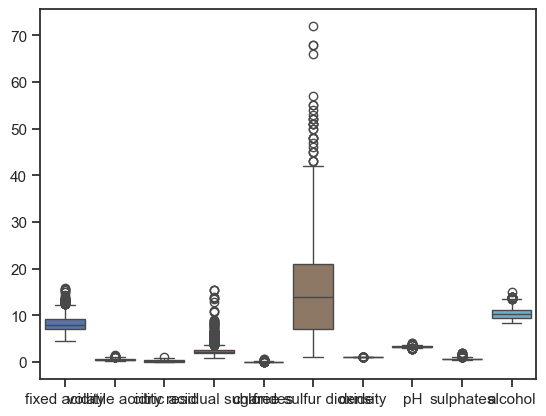

In [44]:
#Применим boxplot seaborn
plt.plot(3, 12)
sns.boxplot(data= dfDep)

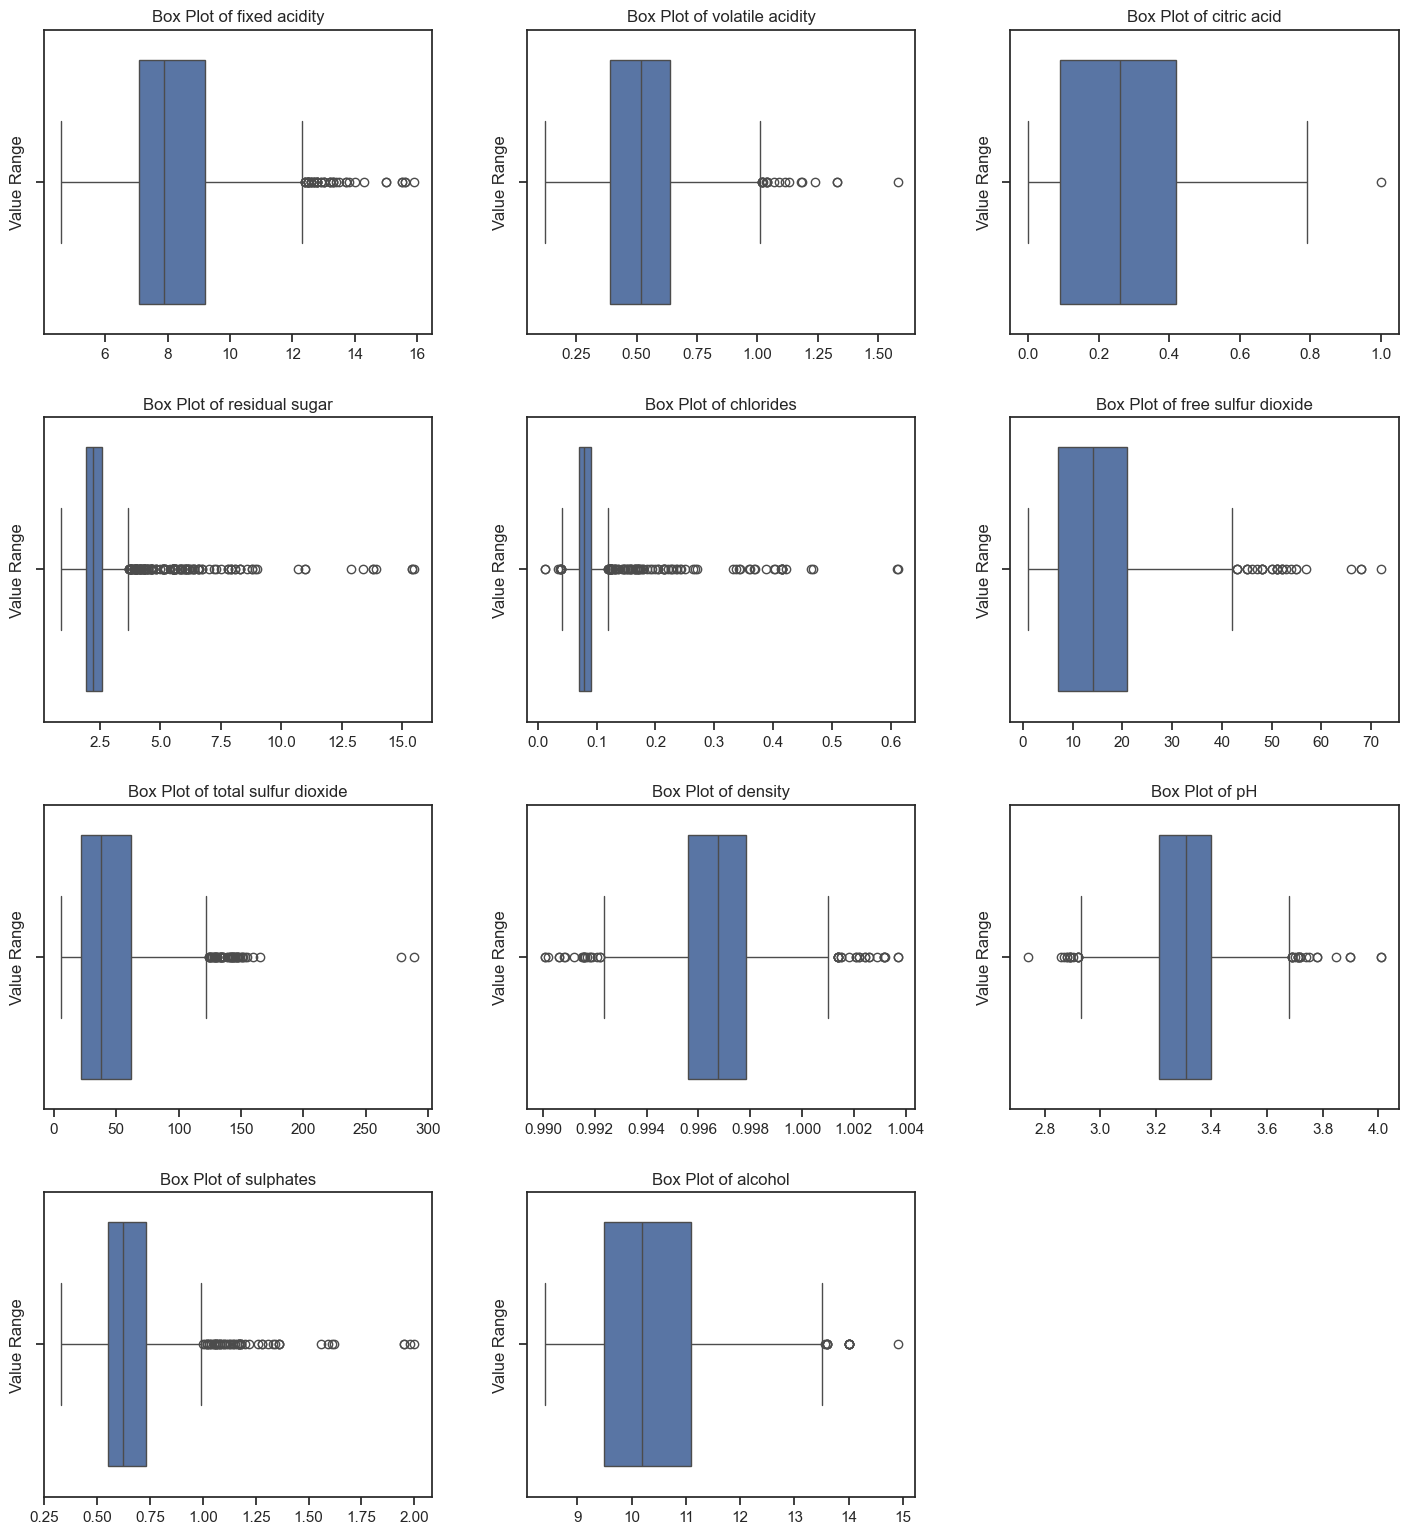

In [51]:
fig, axes = plt.subplots(4, 3, figsize=(15, 16))
fig.tight_layout(pad=3.0)

for i, column in enumerate(data.columns[:-1]):
    row, col = divmod(i, 3)
    sns.boxplot(data=data, x=column, ax=axes[row, col])
    axes[row, col].set_title(f"Box Plot of {column}")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Value Range")

for j in range(len(data.columns) - 1, 12):
    fig.delaxes(axes[j // 3, j % 3])

plt.show()

## **3. Выбираем алгоритм определения дрифта и применяем его**
*Решено исследовать дрифт данных при помощи теста Колмогорова-Смирнова*

In [7]:
X = data.drop(columns=['quality'])
y = data['quality']

In [50]:
#Разделение на два подмножества
split_ratio = 0.5
split_index = int(len(X) * split_ratio)

X_train_1 = X.iloc[:split_index]
X_train_2 = X.iloc[split_index:]
display(X_train_1.head())
display(X_train_2.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
799,9.4,0.500,0.34,3.6,0.082,5.0,14.0,0.99870,3.29,0.52,10.7
800,7.2,0.610,0.08,4.0,0.082,26.0,108.0,0.99641,3.25,0.51,9.4
801,8.6,0.550,0.09,3.3,0.068,8.0,17.0,0.99735,3.23,0.44,10.0
802,5.1,0.585,0.00,1.7,0.044,14.0,86.0,0.99264,3.56,0.94,12.9
803,7.7,0.560,0.08,2.5,0.114,14.0,46.0,0.99710,3.24,0.66,9.6


In [46]:
ks_result = []

for column in X.columns:
  group_one = X_train_1[column]
  group_two = X_train_2[column]

  ks_stat, p_value = ks_2samp(group_one, group_two)
  ks_result.append({'Feature': column, 'KS-statistic': ks_stat, 'P-value': p_value})

ks_result_df = pd.DataFrame(ks_result)
#Cортируем по значениям P-value
display(ks_result_df.sort_values(by='P-value'))

,Feature,KS-statistic,P-value
7,density,0.464770,9.666870e-79
10,alcohol,0.310853,1.057344e-34
0,fixed acidity,0.274646,3.738210e-27
4,chlorides,0.201912,1.064279e-14
2,citric acid,0.194121,1.231822e-13
3,residual sugar,0.174332,4.762430e-11
8,pH,0.152927,1.326065e-08
6,total sulfur dioxide,0.105842,2.186888e-04
5,free sulfur dioxide,0.094387,1.486029e-03
1,volatile acidity,0.067300,4.881952e-02


Дрифт в каждой переменной ниже 0.05

## **3+. Применение инструмента мониторинга**

In [47]:
from flask import Flask
from flask import jsonify

In [48]:
app = Flask(__name__)

@app.route('/distributions', methods=['GET'])
def get_distributions():
    features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
    distributions = []
    for feature in features:
        group_one = X_train_1[feature].tolist()
        group_two = X_train_2[feature].tolist()
        distributions.append({'Feature': feature, 'group 1': group_one, 'group 2': group_two})
    return jsonify(distributions)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## **4. Проанализировать полученные результаты. сделать выводы и описать почему они могли получиться именно такие**

В результате определения дрифта при помощи алгоритма Колмагорова-Сморнова можно сделать вывод, что данные имеют значительные выбросы и дрифты по каждым показателям.